In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
df = pd.read_csv(r'C:\Users\ADMIN\Desktop\loan.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,NO
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,NO
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,NO
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban,NO
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,YES


In [2]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
 12  Loan_Status        367 non-null    object 
dtypes: float64(3), int64(2), object(8)
memory usage: 37.4+ KB


In [3]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


# DATA CLEANING

In [4]:
df["Dependents"].value_counts()

0     200
2      59
1      58
3+     40
Name: Dependents, dtype: int64

In [6]:
df["Dependents"].replace('3+',3,inplace=True)

In [7]:
df["Dependents"].value_counts()

0    200
2     59
1     58
3     40
Name: Dependents, dtype: int64

In [8]:
df['Dependents']=df['Dependents'].astype('float')
df['Dependents'].dtype

dtype('float64')

In [9]:
df.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
Loan_Status           0
dtype: int64

# TREATING NULL VALUES

In [10]:
df.isnull().sum()/len(df)

Loan_ID              0.000000
Gender               0.029973
Married              0.000000
Dependents           0.027248
Education            0.000000
Self_Employed        0.062670
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           0.013624
Loan_Amount_Term     0.016349
Credit_History       0.079019
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [11]:
print("Gende",df["Gender"].mode())
print("Married",df["Married"].mode())
print("Dependents",df["Dependents"].mode())
print("Self_Employed",df["Self_Employed"].mode())
print("Loan_Term",df["Loan_Amount_Term"].mode())
print("Credit_History",df["Credit_History"].mode())

Gende 0    Male
Name: Gender, dtype: object
Married 0    Yes
Name: Married, dtype: object
Dependents 0    0.0
Name: Dependents, dtype: float64
Self_Employed 0    No
Name: Self_Employed, dtype: object
Loan_Term 0    360.0
Name: Loan_Amount_Term, dtype: float64
Credit_History 0    1.0
Name: Credit_History, dtype: float64


In [12]:
df["Gender"].replace(np.nan,"Male",inplace=True)
df["Married"].replace(np.nan,"Yes",inplace=True)
df["Self_Employed"].replace(np.nan,"No",inplace=True)
df["Dependents"].replace(np.nan,0.0,inplace=True)
df["Loan_Amount_Term"].replace(np.nan,360.0,inplace=True)
df["Credit_History"].replace(np.nan,1.0,inplace=True)

In [13]:
kmean=df["LoanAmount"].mean()

In [14]:
df["LoanAmount"].fillna(kmean,inplace=True)

In [15]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [16]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001015,Male,Yes,0.0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,NO
1,LP001022,Male,Yes,1.0,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,NO
2,LP001031,Male,Yes,2.0,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,NO
3,LP001035,Male,Yes,2.0,Graduate,No,2340,2546,100.0,360.0,1.0,Urban,NO
4,LP001051,Male,No,0.0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,YES


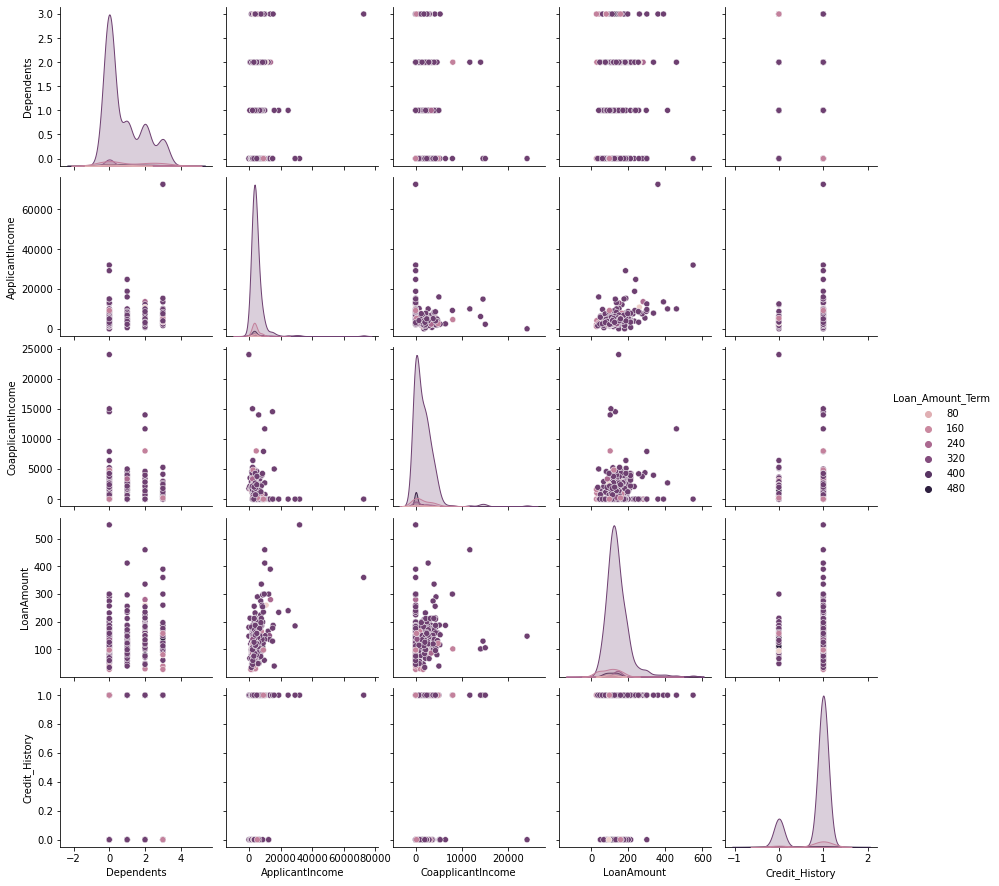

In [17]:
sns.pairplot(data=df,hue='Loan_Amount_Term')

<AxesSubplot:>

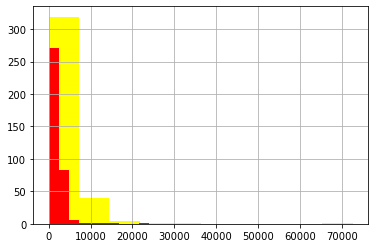

In [18]:
df["ApplicantIncome"].hist(color="yellow")
df["CoapplicantIncome"].hist(color="red")

In [19]:
df["TotalIncome"]=(df["ApplicantIncome"]+df["CoapplicantIncome"])
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,LP001015,Male,Yes,0.0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,NO,5720
1,LP001022,Male,Yes,1.0,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,NO,4576
2,LP001031,Male,Yes,2.0,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,NO,6800
3,LP001035,Male,Yes,2.0,Graduate,No,2340,2546,100.0,360.0,1.0,Urban,NO,4886
4,LP001051,Male,No,0.0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,YES,3276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3.0,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban,NO,5786
363,LP002975,Male,Yes,0.0,Graduate,No,4158,709,115.0,360.0,1.0,Urban,YES,4867
364,LP002980,Male,No,0.0,Graduate,No,3250,1993,126.0,360.0,1.0,Semiurban,NO,5243
365,LP002986,Male,Yes,0.0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural,YES,7393


In [20]:
df.drop(["ApplicantIncome", "CoapplicantIncome"],axis=1,inplace=True)

In [21]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,LP001015,Male,Yes,0.0,Graduate,No,110.0,360.0,1.0,Urban,NO,5720
1,LP001022,Male,Yes,1.0,Graduate,No,126.0,360.0,1.0,Urban,NO,4576
2,LP001031,Male,Yes,2.0,Graduate,No,208.0,360.0,1.0,Urban,NO,6800
3,LP001035,Male,Yes,2.0,Graduate,No,100.0,360.0,1.0,Urban,NO,4886
4,LP001051,Male,No,0.0,Not Graduate,No,78.0,360.0,1.0,Urban,YES,3276


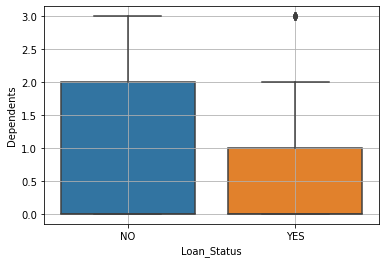

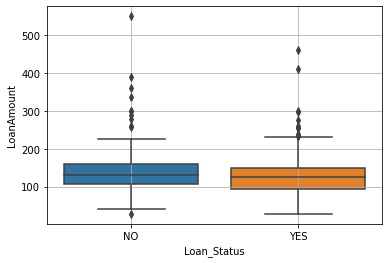

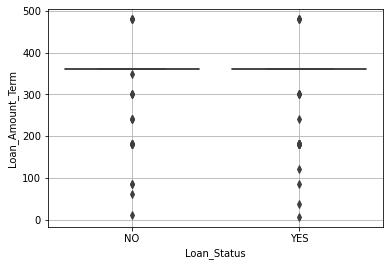

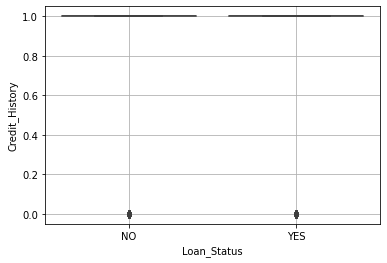

In [22]:
col=df.select_dtypes("float64","int64").columns
for i in df[col]:
    sns.boxplot(data=df,x="Loan_Status",y=df[i])
    plt.grid()
    plt.show()

<AxesSubplot:ylabel='Loan_Status'>

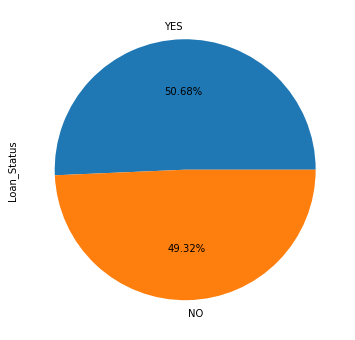

In [23]:
df["Loan_Status"].value_counts().plot(figsize=(6,6),kind='pie',autopct="%.2f%%")

<AxesSubplot:xlabel='Gender', ylabel='count'>

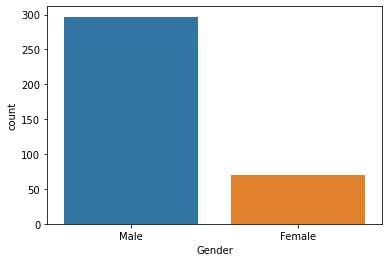

In [24]:
df["Gender"].value_counts()
sns.countplot(df["Gender"])

In [25]:
df["Married"].value_counts()

Yes    233
No     134
Name: Married, dtype: int64

<AxesSubplot:xlabel='Married', ylabel='count'>

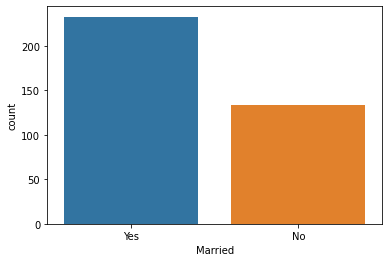

In [26]:
sns.countplot(df["Married"])

In [27]:
df["Education"].value_counts()

Graduate        283
Not Graduate     84
Name: Education, dtype: int64

<AxesSubplot:xlabel='Education', ylabel='count'>

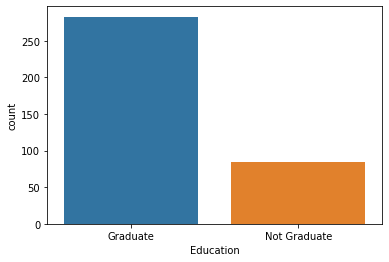

In [28]:
sns.countplot(df["Education"])

# Data Encoding

In [29]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
df[["Loan_ID","Gender","Married","Education","Self_Employed","Property_Area","Loan_Status"]]=oe.fit_transform(df[["Loan_ID","Gender","Married","Education","Self_Employed","Property_Area","Loan_Status"]])

In [31]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,0.0,1.0,1.0,0.0,0.0,0.0,110.0,360.0,1.0,2.0,0.0,5720
1,1.0,1.0,1.0,1.0,0.0,0.0,126.0,360.0,1.0,2.0,0.0,4576
2,2.0,1.0,1.0,2.0,0.0,0.0,208.0,360.0,1.0,2.0,0.0,6800
3,3.0,1.0,1.0,2.0,0.0,0.0,100.0,360.0,1.0,2.0,0.0,4886
4,4.0,1.0,0.0,0.0,1.0,0.0,78.0,360.0,1.0,2.0,1.0,3276


<AxesSubplot:>

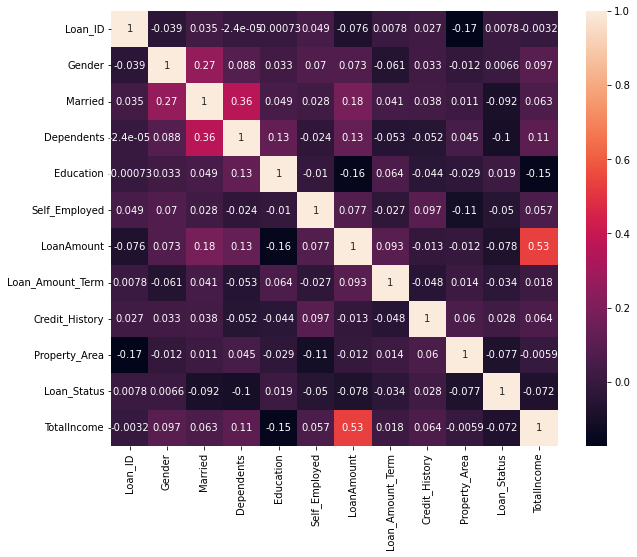

In [32]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

# Selecting feature and target variables

In [33]:
feature=df.drop("Loan_Status",axis=1)
feature.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome
0,0.0,1.0,1.0,0.0,0.0,0.0,110.0,360.0,1.0,2.0,5720
1,1.0,1.0,1.0,1.0,0.0,0.0,126.0,360.0,1.0,2.0,4576
2,2.0,1.0,1.0,2.0,0.0,0.0,208.0,360.0,1.0,2.0,6800
3,3.0,1.0,1.0,2.0,0.0,0.0,100.0,360.0,1.0,2.0,4886
4,4.0,1.0,0.0,0.0,1.0,0.0,78.0,360.0,1.0,2.0,3276


In [34]:
target=df.iloc[:,-2]
target.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    1.0
Name: Loan_Status, dtype: float64

In [35]:
# TRAIN TEST SPLIT
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(feature,target,test_size=0.3,random_state=0)
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(256, 11)
(111, 11)
(256,)
(111,)


# ML MODEL CREATION

In [36]:
def mymodel(model):
    model.fit(xtrain,ytrain)
    ypred=model.predict(xtest)
    
    train=model.score(xtrain,ytrain)
    test=model.score(xtest,ytest)
    
    print(f"Training score: {train}\nTesting score: {test}")
    print(f"\nAccuracy: ",accuracy_score(ytest,ypred))
    print(f"\nClassification report: \n",classification_report(ytest,ypred))
    
    
    return model

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,accuracy_score

In [38]:
knn=mymodel(KNeighborsClassifier())

Training score: 0.671875
Testing score: 0.5315315315315315

Accuracy:  0.5315315315315315

Classification report: 
               precision    recall  f1-score   support

         0.0       0.53      0.56      0.54        55
         1.0       0.54      0.50      0.52        56

    accuracy                           0.53       111
   macro avg       0.53      0.53      0.53       111
weighted avg       0.53      0.53      0.53       111



# HYPERPARAMETER TESTING

In [39]:
trainac=[]
testac=[]


for i in range(1,30):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain,ytrain)
    
    train=knn.score(xtrain,ytrain)
    test=knn.score(xtest,ytest)
    
    trainac.append(train)
    testac.append(test)

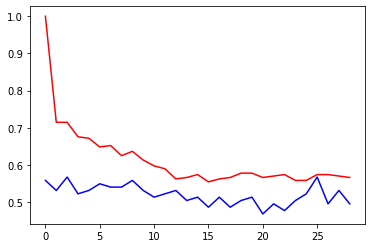

In [40]:
plt.plot(trainac,color="red")
plt.plot(testac,color="blue")

In [41]:
knn=mymodel(KNeighborsClassifier(n_neighbors=17))
knn.fit(xtrain,ytrain)
ypred=knn.predict(xtest)

Training score: 0.5625
Testing score: 0.5135135135135135

Accuracy:  0.5135135135135135

Classification report: 
               precision    recall  f1-score   support

         0.0       0.51      0.45      0.48        55
         1.0       0.52      0.57      0.54        56

    accuracy                           0.51       111
   macro avg       0.51      0.51      0.51       111
weighted avg       0.51      0.51      0.51       111



In [42]:
lr=mymodel(LogisticRegression())

Training score: 0.56640625
Testing score: 0.5135135135135135

Accuracy:  0.5135135135135135

Classification report: 
               precision    recall  f1-score   support

         0.0       0.51      0.44      0.47        55
         1.0       0.52      0.59      0.55        56

    accuracy                           0.51       111
   macro avg       0.51      0.51      0.51       111
weighted avg       0.51      0.51      0.51       111



In [43]:
dt=mymodel(DecisionTreeClassifier())

Training score: 1.0
Testing score: 0.5585585585585585

Accuracy:  0.5585585585585585

Classification report: 
               precision    recall  f1-score   support

         0.0       0.55      0.58      0.57        55
         1.0       0.57      0.54      0.55        56

    accuracy                           0.56       111
   macro avg       0.56      0.56      0.56       111
weighted avg       0.56      0.56      0.56       111

